## Exploratory Data Analysis

## Dictionary:

age; workclass; fnlwgt; education; education-num; marital-status; occupation; relationship; race; sex: 1 if female else 0; capital-gain; capital-loss; hours-per-week; native-country; target: 1 if >50K else 0; *age;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('Solarize_Light2')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/renfelo/datascience/master/others/data_science/notebooks/city_census/data/census.csv')

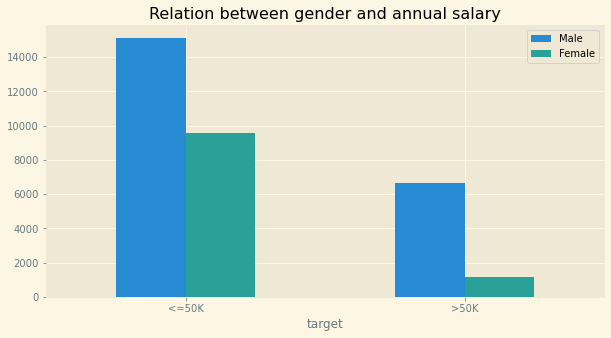

In [3]:
fig, ax = plt.subplots(figsize=(10,5))

pd.crosstab(df['target'], df['sex']).plot(kind= 'bar', title= 'Relation between gender and annual salary', ax= ax)
ax.set_xticklabels(['<=50K', '>50K'], rotation = 0)
ax.legend(['Male', 'Female'])

Text(0.5, 1.0, 'Relation between education level and hours of work')

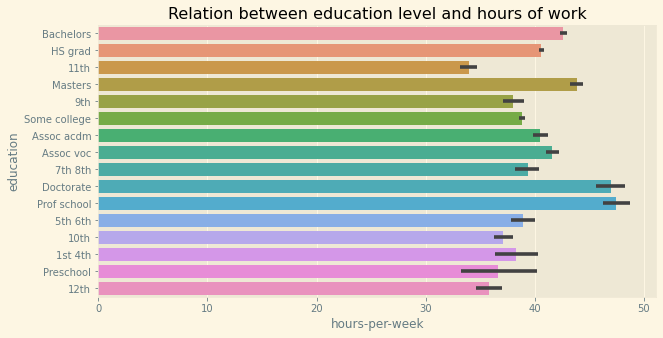

In [4]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(df['hours-per-week'], df['education'], ax = ax)
ax.set_title('Relation between education level and hours of work')

## Data Preprocessing

Features age; workclass; fnlwgt; education; education-num; marital-status; occupation; relationship; race; sex: 1 if female else 0; capital-gain; capital-loss; hours-per-week; native-country; target: 1 if >50K else 0;

In [5]:
import numpy as np
import re

In [53]:
#Get data directly from UCI ML using 'read_table'

raw_data = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, sep =',' , error_bad_lines = False)

In [54]:
#Security copy (just in case...)
df = raw_data.copy()

In [55]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [56]:
#Hmm we have a problem here, there are no column names, lets fix that now

column_names =  ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']
df.columns = column_names
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Wrangling

Lets verify how consistent are the column data and modify if necessary

In [57]:
def verify_data_spread():
    for column in df.columns:
        print(column, ':\n\n')
        print(df[column].value_counts()) 

In [58]:
verify_data_spread()

age :


36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
workclass :


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
fnlwgt :


164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64
education :


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Pre

In [64]:
df.replace('?', value = 'missing', inplace = True)

## More Modifications

some columns can be already modified to boolean ones, like sexand target, There are a bunch of zeros inside some columns, but they are necessary

In [71]:
df.tail(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [72]:
df['sex'].value_counts(), df['target'].value_counts()

( Male      21790
  Female    10771
 Name: sex, dtype: int64,
  <=50K    24720
  >50K      7841
 Name: target, dtype: int64)

In [73]:
#Booleanizing (huh) categories
df['sex'] = df.sex.apply(lambda x: 1 if 'Female' in x else 0)
df['target'] = df.target.apply(lambda x: 1 if '>50K' in x else 0)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [75]:
df['sex'].value_counts(), df['target'].value_counts()

(0    21790
 1    10771
 Name: sex, dtype: int64,
 0    24720
 1     7841
 Name: target, dtype: int64)

## Estimators

Features age; workclass; fnlwgt; education; education-num; marital-status; occupation; relationship; race; sex: 1 if female else 0; capital-gain; capital-loss; hours-per-week; native-country; target: 1 if >50K else 0;

## Lets create our X and y variables

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
#Taking a sample from the entire population
sample = df.iloc[:10000]

X = sample.drop('target', axis = 1)
y = sample['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Data Imputation

In [78]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

Lets import our model

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

Pipeline to impute missing data and convert categorical columns into numbers

In [80]:
categorical_features = ['workclass','education', 'marital-status', 'occupation', 'relationship','race', 'native-country']
categorical_imputer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value= 'missing')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_features = ['age', 'fnlwgt', 'education-num', 'sex', 'capital-loss', 'capital-gain', 'hours-per-week']
numerical_imputer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value= -1))])

preprocessor = ColumnTransformer(transformers=[('cat', categorical_imputer, categorical_features), ('num', numerical_imputer, numerical_features)])

## Functions to get the base scores for each model

Please notice that my computer doesn't have enough power to fit all the dataset entries so i reduced it to  a sample of 10K only

In [81]:
def get_base_prediction(model_dict):
    scores = {}
    for name, model in model_dict.items():
        model = Pipeline(steps= [('preprocessor', preprocessor), ('model', model)])
        model.fit(X_train, y_train)
        scores[name] = f'{model.score(X_test, y_test) * 100}%'
    return scores

get_base_prediction({'random_forest' : RandomForestClassifier(),
                    'k_neighbors' : KNeighborsClassifier(),
                    'linear_svc': LinearSVC()})

C:\Users\PAA KWESI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'random_forest': '85.75%', 'k_neighbors': '76.75%', 'linear_svc': '78.85%'}

## Hyperparameters tuning

In [82]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## RandomizedSearch CV

In [83]:
rf_grid = {
    'model_n_estimators' : np.arange(250,350,5),
    'model_max_depth' : np.arange(30,60,5),
    'model_min_samples_split' : np.arange(5,15,5),
    'model_min_samples_leaf' : np.arange(0,10,1)
}

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_jobs = -1))
])

rscv = RandomizedSearchCV(model, param_distributions=rf_grid, n_iter=30)

#rscv.fit(X_train, y_train)
#print(rscv.best_params_)
#print(f'{rscv.score(X_test, y_test) * 100}%')

In [84]:
rsrf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_jobs = -1, n_estimators=285, min_samples_split=10, min_samples_leaf=2, max_depth=45))
])

rsrf_model.fit(X_train, y_train)
print(f'Tuned model score: {rsrf_model.score(X_test, y_test) * 100}%')

Tuned model score: 86.85000000000001%


## GridSearch CV

In [ ]:
rf_grid = {
    'model_n_estimators' : [250,280,300],
    'model_max_depth' : [45,50,55],
    'model_min_samples_split' : [10,12],
    'model_min_samples_leaf' : [1, 3, 5]
}

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_jobs = -1))
])

gscv = GridSearchCV(model, param_grid=rf_grid, n_jobs= -1)
gscv.fit(X_train, y_train)
print(gscv.best_params_)
print(f'{gscv.score(X_test, y_test) * 100}%')

## Model Evaluation

In [87]:
from sklearn.metrics import classification_report

In [88]:
y_preds = rsrf_model.predict(X_test)
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.881265,0.802469,0.8685,0.841867,0.863181
recall,0.958469,0.566449,0.8685,0.762459,0.868500
f1-score,0.918247,0.664112,0.8685,0.791180,0.859923
support,1541.000000,459.000000,0.8685,2000.000000,2000.000000
